# Load Approval Prediction using TensorFlow

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd 

In [2]:
df=pd.read_csv(r"loan_data_1.csv")

In [3]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(381, 14)

In [5]:
df.info

<bound method DataFrame.info of      Unnamed: 0   Loan_ID  Gender Married Dependents     Education  \
0             0  LP001003    Male     Yes          1      Graduate   
1             1  LP001005    Male     Yes          0      Graduate   
2             2  LP001006    Male     Yes          0  Not Graduate   
3             3  LP001008    Male      No          0      Graduate   
4             4  LP001013    Male     Yes          0  Not Graduate   
..          ...       ...     ...     ...        ...           ...   
376         376  LP002953    Male     Yes         3+      Graduate   
377         377  LP002974    Male     Yes          0      Graduate   
378         378  LP002978  Female      No          0      Graduate   
379         379  LP002979    Male     Yes         3+      Graduate   
380         380  LP002990  Female      No          0           NaN   

    Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              No           4583.0             1508.0     

In [6]:
df.isna().sum()

Unnamed: 0            0
Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             6
Self_Employed        21
ApplicantIncome      12
CoapplicantIncome    18
LoanAmount            8
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
for i in ['Gender','Married','Self_Employed','Education','Property_Area','Loan_Status']:
    print(f"Unique values for columns {i} -> {df[i].unique()}")

Unique values for columns Gender -> ['Male' 'Female' nan]
Unique values for columns Married -> ['Yes' 'No']
Unique values for columns Self_Employed -> ['No' 'Yes' nan]
Unique values for columns Education -> ['Graduate' 'Not Graduate' nan]
Unique values for columns Property_Area -> ['Rural' 'Urban' 'Semiurban']
Unique values for columns Loan_Status -> ['N' 'Y']


In [8]:
df=df.dropna()
df.shape

(272, 14)

In [9]:
for i in ['Gender','Married','Self_Employed','Education','Property_Area','Loan_Status']:
    print(f"Unique values for columns {i} -> {df[i].unique()}")

Unique values for columns Gender -> ['Male' 'Female']
Unique values for columns Married -> ['Yes' 'No']
Unique values for columns Self_Employed -> ['No' 'Yes']
Unique values for columns Education -> ['Graduate' 'Not Graduate']
Unique values for columns Property_Area -> ['Rural' 'Urban' 'Semiurban']
Unique values for columns Loan_Status -> ['N' 'Y']


In [10]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,4,LP001013,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [11]:
df=df.drop(columns=["Unnamed: 0","Loan_ID"])

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333.0,1516.0,95.0,360.0,1.0,Urban,Y


In [13]:
df=pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Property_Area'])
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4583.0,1508.0,128.0,360.0,1.0,N,False,True,False,True,True,False,True,False,True,False,False
1,0,3000.0,0.0,66.0,360.0,1.0,Y,False,True,False,True,True,False,False,True,False,False,True
2,0,2583.0,2358.0,120.0,360.0,1.0,Y,False,True,False,True,False,True,True,False,False,False,True
3,0,6000.0,0.0,141.0,360.0,1.0,Y,False,True,True,False,True,False,True,False,False,False,True
4,0,2333.0,1516.0,95.0,360.0,1.0,Y,False,True,False,True,False,True,True,False,False,False,True


In [14]:
# Check the data types of each column
column_types = df.dtypes

# Print the data types of each column
print(column_types)

Dependents                  object
ApplicantIncome            float64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Education_Graduate            bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Property_Area_Rural           bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object


In [15]:
for i in df.columns:
    if df[i].dtype in ['bool','float64']:
        print(f"Converting bool to 0 and 1s for {i}")
        df[i] = df[i].astype(int)

Converting bool to 0 and 1s for ApplicantIncome
Converting bool to 0 and 1s for CoapplicantIncome
Converting bool to 0 and 1s for LoanAmount
Converting bool to 0 and 1s for Loan_Amount_Term
Converting bool to 0 and 1s for Credit_History
Converting bool to 0 and 1s for Gender_Female
Converting bool to 0 and 1s for Gender_Male
Converting bool to 0 and 1s for Married_No
Converting bool to 0 and 1s for Married_Yes
Converting bool to 0 and 1s for Education_Graduate
Converting bool to 0 and 1s for Education_Not Graduate
Converting bool to 0 and 1s for Self_Employed_No
Converting bool to 0 and 1s for Self_Employed_Yes
Converting bool to 0 and 1s for Property_Area_Rural
Converting bool to 0 and 1s for Property_Area_Semiurban
Converting bool to 0 and 1s for Property_Area_Urban


In [16]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508,128,360,1,N,0,1,0,1,1,0,1,0,1,0,0
1,0,3000,0,66,360,1,Y,0,1,0,1,1,0,0,1,0,0,1
2,0,2583,2358,120,360,1,Y,0,1,0,1,0,1,1,0,0,0,1
3,0,6000,0,141,360,1,Y,0,1,1,0,1,0,1,0,0,0,1
4,0,2333,1516,95,360,1,Y,0,1,0,1,0,1,1,0,0,0,1


In [17]:
df['Loan_Status'] = df['Loan_Status'].map({"Y":1,"N":0})

In [18]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508,128,360,1,0,0,1,0,1,1,0,1,0,1,0,0
1,0,3000,0,66,360,1,1,0,1,0,1,1,0,0,1,0,0,1
2,0,2583,2358,120,360,1,1,0,1,0,1,0,1,1,0,0,0,1
3,0,6000,0,141,360,1,1,0,1,1,0,1,0,1,0,0,0,1
4,0,2333,1516,95,360,1,1,0,1,0,1,0,1,1,0,0,0,1


In [19]:
df.Dependents.unique()

array(['1', '0', '2', '3+'], dtype=object)

In [20]:
# Convert 1.0 to 1 and 0.0 to 0
df['Dependents'] = df['Dependents'].str.replace("3+","3")
df['Dependents'] = df['Dependents'].astype(int)

In [21]:
# Check the data types of each column
column_types = df.dtypes

# Print the data types of each column
print(column_types)

Dependents                 int32
ApplicantIncome            int32
CoapplicantIncome          int32
LoanAmount                 int32
Loan_Amount_Term           int32
Credit_History             int32
Loan_Status                int64
Gender_Female              int32
Gender_Male                int32
Married_No                 int32
Married_Yes                int32
Education_Graduate         int32
Education_Not Graduate     int32
Self_Employed_No           int32
Self_Employed_Yes          int32
Property_Area_Rural        int32
Property_Area_Semiurban    int32
Property_Area_Urban        int32
dtype: object


In [22]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508,128,360,1,0,0,1,0,1,1,0,1,0,1,0,0
1,0,3000,0,66,360,1,1,0,1,0,1,1,0,0,1,0,0,1
2,0,2583,2358,120,360,1,1,0,1,0,1,0,1,1,0,0,0,1
3,0,6000,0,141,360,1,1,0,1,1,0,1,0,1,0,0,0,1
4,0,2333,1516,95,360,1,1,0,1,0,1,0,1,1,0,0,0,1


In [23]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']
X.shape,y.shape

((272, 17), (272,))

In [24]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
model_tf = tf.keras.Sequential(
[
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [26]:
model_tf.compile(
            loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
            metrics=['accuracy']
)

In [27]:
history=model_tf.fit(X_train,y_train,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 400.7897 - accuracy: 0.5760
Epoch 2/100
7/7 [==============================] - 0s 2ms/step - loss: 15.4122 - accuracy: 0.6221
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 5.0056 - accuracy: 0.5530
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.9268 - accuracy: 0.6175
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.7097
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.5878 - accuracy: 0.7373
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.6590
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6033 - accuracy: 0.7189
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 0.6007 - accuracy: 0.7465
Epoch 10/100
7/7 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.7465
Epoch 11/100
7/7 [========

<Axes: >

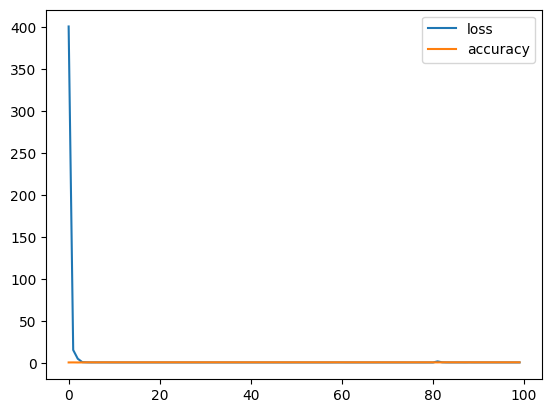

In [28]:
pd.DataFrame(history.history).plot()

In [29]:
loss, accuracy = model_tf.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

2/2 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.7273
Model loss on the test set: 0.5826514363288879
Model accuracy on the test set: 72.73%


# After normalizing the data

In [30]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508,128,360,1,0,0,1,0,1,1,0,1,0,1,0,0
1,0,3000,0,66,360,1,1,0,1,0,1,1,0,0,1,0,0,1
2,0,2583,2358,120,360,1,1,0,1,0,1,0,1,1,0,0,0,1
3,0,6000,0,141,360,1,1,0,1,1,0,1,0,1,0,0,0,1
4,0,2333,1516,95,360,1,1,0,1,0,1,0,1,1,0,0,0,1


In [31]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'salary' column
df['ApplicantIncome'] = scaler.fit_transform(df[['ApplicantIncome']])
df['CoapplicantIncome'] = scaler.fit_transform(df[['CoapplicantIncome']])
df['LoanAmount'] = scaler.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = scaler.fit_transform(df[['Loan_Amount_Term']])
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0.464043,0.044567,0.843972,0.72973,1,0,0,1,0,1,1,0,1,0,1,0,0
1,0,0.298336,0.000000,0.404255,0.72973,1,1,0,1,0,1,1,0,0,1,0,0,1
2,0,0.254684,0.069687,0.787234,0.72973,1,1,0,1,0,1,0,1,1,0,0,0,1
3,0,0.612373,0.000000,0.936170,0.72973,1,1,0,1,1,0,1,0,1,0,0,0,1
4,0,0.228515,0.044803,0.609929,0.72973,1,1,0,1,0,1,0,1,1,0,0,0,1


In [79]:
X=df.drop(columns=['Loan_Status'])
y=df['Loan_Status']
X.shape,y.shape

((272, 17), (272,))

In [145]:
#Splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [228]:
tf.random.set_seed(42)
model_tf = tf.keras.Sequential(
[
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(rate=0.02),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [229]:
model_tf.compile(
            loss=tf.keras.losses.BinaryCrossentropy(),
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
            metrics=['accuracy']
)

In [230]:
history=model_tf.fit(X_train,y_train,epochs=150,verbose=0)

<Axes: >

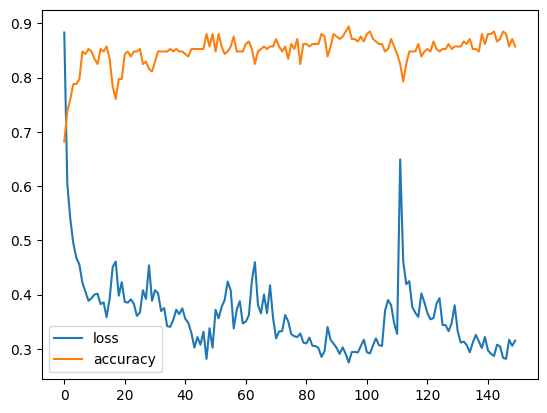

In [231]:
pd.DataFrame(history.history).plot()

In [232]:
loss, accuracy = model_tf.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")
     

2/2 [==============================] - 0s 4ms/step - loss: 0.9747 - accuracy: 0.8182
Model loss on the test set: 0.9746555685997009
Model accuracy on the test set: 81.82%


In [156]:
model_tf.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 100)               1800      
                                                                 
 dense_89 (Dense)            (None, 100)               10100     
                                                                 
 dense_90 (Dense)            (None, 64)                6464      
                                                                 
 dense_91 (Dense)            (None, 64)                4160      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_92 (Dense)            (None, 1)                 65        
                                                                 
Total params: 22589 (88.24 KB)
Trainable params: 2258

# Temp work

In [233]:
print(tf.__version__)

2.13.0


In [234]:
b=tf.constant([
    [[12,5]],
    [[3,5]],
])
b.ndim,b.shape

(3, TensorShape([2, 1, 2]))

In [235]:
b=tf.constant([
    [3,5],
    [67,80],
])
b.ndim,b.shape

(2, TensorShape([2, 2]))

In [236]:
#b=tf.constant(X_train,dtype=tf.int64)
b=tf.constant(X_train)
b.ndim,b.shape

(2, TensorShape([217, 17]))

In [237]:
type(X_train)

pandas.core.frame.DataFrame

In [238]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 46 to 133
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               217 non-null    int32  
 1   ApplicantIncome          217 non-null    float64
 2   CoapplicantIncome        217 non-null    float64
 3   LoanAmount               217 non-null    float64
 4   Loan_Amount_Term         217 non-null    float64
 5   Credit_History           217 non-null    int32  
 6   Gender_Female            217 non-null    int32  
 7   Gender_Male              217 non-null    int32  
 8   Married_No               217 non-null    int32  
 9   Married_Yes              217 non-null    int32  
 10  Education_Graduate       217 non-null    int32  
 11  Education_Not Graduate   217 non-null    int32  
 12  Self_Employed_No         217 non-null    int32  
 13  Self_Employed_Yes        217 non-null    int32  
 14  Property_Area_Rural      217 n

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 46 to 133
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               217 non-null    int32  
 1   ApplicantIncome          217 non-null    float64
 2   CoapplicantIncome        217 non-null    float64
 3   LoanAmount               217 non-null    float64
 4   Loan_Amount_Term         217 non-null    float64
 5   Credit_History           217 non-null    int32  
 6   Gender_Female            217 non-null    int32  
 7   Gender_Male              217 non-null    int32  
 8   Married_No               217 non-null    int32  
 9   Married_Yes              217 non-null    int32  
 10  Education_Graduate       217 non-null    int32  
 11  Education_Not Graduate   217 non-null    int32  
 12  Self_Employed_No         217 non-null    int32  
 13  Self_Employed_Yes        217 non-null    int32  
 14  Property_Area_Rural      217 n